MOST WATCHED NETFLIX ORIGINAL SHOWS

Revealing the Global Phenomenon: A Deep Dive into IMDb Data on Most-Watched Netflix Original Shows , This file consists of data from Imdb stating the most watched Netflix original shows globally. This contains columns which tells us the timing of the each episode or in total, rating, genre and number of votes given to each of them.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\sujal bajaj\Downloads\imdb.csv")

In [4]:
print(df)

    lister-item-index       lister-item-header certificate runtime  \
0                 1.0          Stranger Things          15  60 min   
1                 2.0           13 Reasons Why          18  60 min   
2                 3.0  Orange Is the New Black          18  59 min   
3                 4.0             Black Mirror          18  60 min   
4                 5.0              Money Heist          15  60 min   
..                ...                      ...         ...     ...   
75               76.0          F Is for Family          15  30 min   
76               77.0                The Ranch          15  30 min   
77               78.0          American Vandal          15  34 min   
78               79.0               Dead to Me          15  30 min   
79               80.0                Quicksand          18  45 min   

                       genre  rating      votes  
0     Drama, Fantasy, Horror     8.7  1,327,188  
1   Drama, Mystery, Thriller     7.5    314,321  
2       C

In [5]:
df.shape

(80, 7)

In [6]:
df.head()

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
0,1.0,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,2.0,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,3.0,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,4.0,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,5.0,Money Heist,15,60 min,"Action, Crime, Drama",8.2,"529,086"


In [7]:
df.tail()

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
75,76.0,F Is for Family,15,30 min,"Animation, Comedy, Drama",8.0,"41,074"
76,77.0,The Ranch,15,30 min,"Comedy, Drama, Western",7.5,"42,401"
77,78.0,American Vandal,15,34 min,"Comedy, Crime, Drama",8.1,"32,985"
78,79.0,Dead to Me,15,30 min,"Comedy, Crime, Drama",7.9,"99,440"
79,80.0,Quicksand,18,45 min,"Crime, Drama, Mystery",7.4,"25,507"


In [7]:
df['lister-item-index'] = df['lister-item-index'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     int32  
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(1), int32(1), object(5)
memory usage: 4.2+ KB


In [51]:
df.sample(5)

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
53,54,Dear White People,15,30 min,"Comedy, Drama",6.4,"26,364"
12,13,Dark,15,60 min,"Crime, Drama, Mystery",8.7,"440,321"
31,32,Altered Carbon,18,60 min,"Action, Drama, Sci-Fi",7.9,"187,859"
75,76,F Is for Family,15,30 min,"Animation, Comedy, Drama",8.0,"41,074"
72,73,Arrested Development,15,22 min,Comedy,8.7,"323,189"


In [12]:
df.isna().sum()

lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes                 0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [52]:
df['certificate'].unique()

array(['15', '18', '12', 'PG'], dtype=object)

In [53]:
df.drop(columns=['lister-item-index'],inplace=True)

In [54]:
df.describe()

,rating
count,80.00000
mean,7.72000
std,0.71235
min,5.90000
25%,7.20000
50%,7.80000
75%,8.22500
max,8.80000


In [55]:
df['rating'].aggregate(['sum', 'mean','max','min']).reset_index()

,index,rating
0,sum,617.60
1,mean,7.72
2,max,8.80
3,min,5.90


In [56]:
df.columns

Index(['lister-item-header', 'certificate', 'runtime', 'genre', 'rating',
       'votes'],
      dtype='object')

In [57]:
df['certificate'].value_counts()

certificate
15    53
18    20
12     4
PG     3
Name: count, dtype: int64

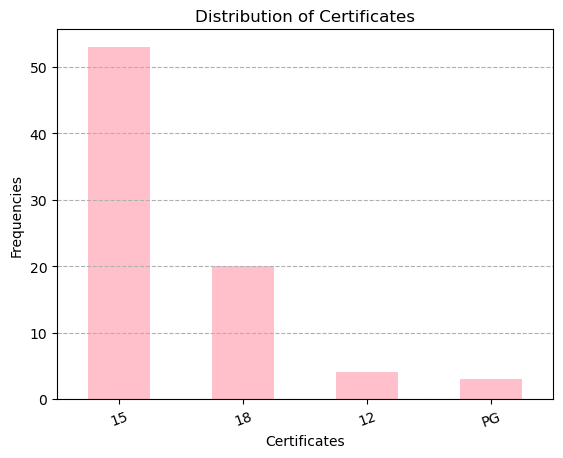

In [58]:
cert_uniq=df['certificate'].unique()
cert_counts=df['certificate'].value_counts()

cert_counts.plot(kind='bar',color='pink')
plt.title('Distribution of Certificates')
plt.xlabel('Certificates')
plt.ylabel('Frequencies')
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle = "--",alpha=1)

plt.show()

In [59]:
df['runtime'].describe()

count         80
unique        27
top       60 min
freq          25
Name: runtime, dtype: object

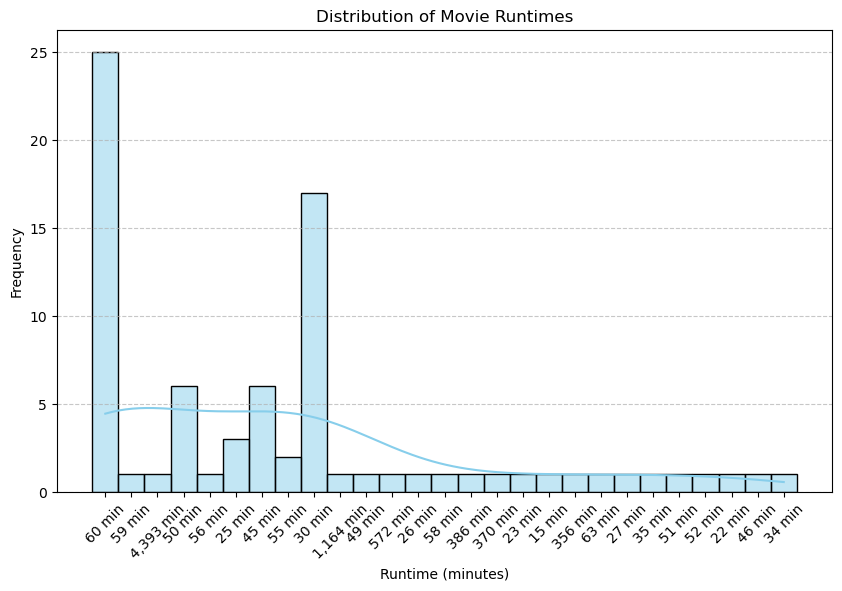

In [8]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, color='skyblue',kde=True, edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
df['genre'].value_counts().reset_index()

,genre,count
0,"Comedy, Drama",8
1,"Drama, Mystery, Sci-Fi",5
2,"Action, Crime, Drama",5
3,"Drama, Fantasy, Horror",4
4,Comedy,4
5,"Crime, Drama, Mystery",4
6,"Comedy, Crime, Drama",3
7,Drama,3
8,"Action, Adventure, Crime",2
9,"Action, Adventure, Drama",2


In [12]:
top10_genre=(df['genre'].value_counts()).head(10)

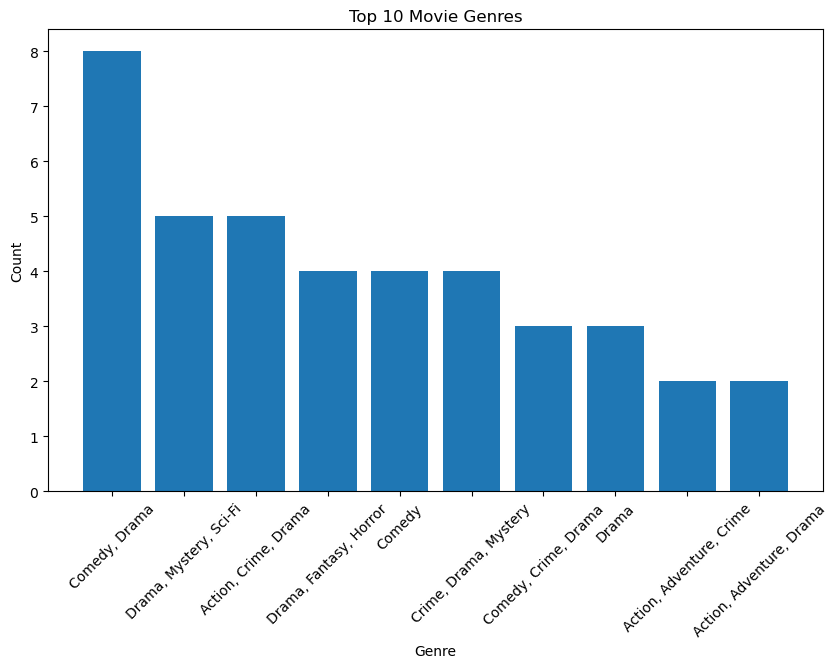

In [13]:
plt.figure(figsize=(10,6))
plt.bar(top10_genre.index,(df['genre'].value_counts()).head(10))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=45)
plt.show()


In [14]:
least_voted = df.loc[df['votes'].idxmax()]
most_voted = df.loc[df['votes'].idxmin()]
print("Most Voted Movie\n",most_voted[['lister-item-header', 'votes']])
print("  ")
print("Least Voted Movie:\n",least_voted[['lister-item-header', 'votes']])

Most Voted Movie
 lister-item-header    Stranger Things
votes                       1,327,188
Name: 0, dtype: object
  
Least Voted Movie:
 lister-item-header    Dead to Me
votes                     99,440
Name: 78, dtype: object


In [15]:
least_voted

lister-item-index                     79.0
lister-item-header              Dead to Me
certificate                             15
runtime                             30 min
genre                 Comedy, Crime, Drama
rating                                 7.9
votes                               99,440
Name: 78, dtype: object

In [16]:
most_voted

lister-item-index                        1.0
lister-item-header           Stranger Things
certificate                               15
runtime                               60 min
genre                 Drama, Fantasy, Horror
rating                                   8.7
votes                              1,327,188
Name: 0, dtype: object

In [17]:
least_rating_movie = df.loc[df['rating'].idxmax()]
most_rating_movie = df.loc[df['rating'].idxmin()]

In [18]:
least_rating_movie

lister-item-index                         7.0
lister-item-header                     Narcos
certificate                                15
runtime                                50 min
genre                 Biography, Crime, Drama
rating                                    8.8
votes                                 467,909
Name: 6, dtype: object

In [21]:
most_rating_movie

lister-item-index                       66.0
lister-item-header                   Between
certificate                               15
runtime                               60 min
genre                 Drama, Mystery, Sci-Fi
rating                                   5.9
votes                                  9,906
Name: 65, dtype: object

In [19]:
df.loc[df['runtime'].idxmax()]

lister-item-index                      57.0
lister-item-header       RuPaul's Drag Race
certificate                              15
runtime                              63 min
genre                 Game-Show, Reality-TV
rating                                  8.5
votes                                23,189
Name: 56, dtype: object

In [20]:
df.loc[df['runtime'].idxmin()]

lister-item-index                               28.0
lister-item-header    A Series of Unfortunate Events
certificate                                       PG
runtime                                    1,164 min
genre                       Adventure, Comedy, Drama
rating                                           7.7
votes                                         66,482
Name: 27, dtype: object